In [3]:
import pandas as pd
import numpy as np
import tqdm
import json
import sys
wd = "/Netflix-Movies-Recommender/scrape/"

In [4]:
with open(wd+"letterboxd_movie_reviews.json", encoding='utf8') as f:
    all_lines = f.read().splitlines()

In [5]:
sys.getsizeof(all_lines)

33920

# Get recurrent user list

In [6]:
users = []
for i in range(len(all_lines)):
    users.extend(list(json.loads(all_lines[i]).keys())[1:-1])

In [7]:
from collections import Counter
count_users = Counter(users)

In [29]:
recurrent_users = {key:val for key, val in count_users.items() if val > 49}
recurrent_users = list(recurrent_users.keys())
len(recurrent_users)

21013

# Save in tabular format, only users with 50+ reviews

In [30]:
chunks = np.array_split(list(range(len(all_lines))), 20)
df_list = []
for chunk in tqdm.tqdm(chunks):
    df_inter = pd.DataFrame(all_lines[chunk[0]:chunk[-1]])
    df_inter.columns = ['json_element']
    df = pd.json_normalize(df_inter['json_element'].apply(json.loads))
    del(df_inter)
    cols_to_keep = list(set(users).difference(set(recurrent_users)).intersection(set(df.columns)))
    df_list.append(df.drop(columns=cols_to_keep).astype(pd.SparseDtype("int", np.nan)))


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [05:11<00:00, 15.57s/it]


In [31]:
df_final = pd.concat(df_list, axis=0)

In [32]:
df_final.shape

(4030, 21096)

In [33]:
df_final = df_final.astype(pd.SparseDtype("int", np.nan))

In [34]:
sys.getsizeof(df_final)

14121376

In [36]:
df_final.dtypes

show_id             Sparse[int32, nan]
/cainamoura/        Sparse[int32, nan]
/mattmicucci/       Sparse[int32, nan]
/1001films/         Sparse[int32, nan]
/jgarcia2473/       Sparse[int32, nan]
                           ...        
/mujahidmansor/     Sparse[int32, nan]
/notrhea/           Sparse[int32, nan]
/sarahl945/         Sparse[int32, nan]
/thegoofygoober/    Sparse[int32, nan]
/sbmilagros/        Sparse[int32, nan]
Length: 21096, dtype: object

In [37]:
df_final.head()

,show_id,/cainamoura/,/mattmicucci/,/1001films/,/jgarcia2473/,/lostgoonie1980/,/catpanther/,/ingmarbergmanz/,/j1l2e/,/_alison_/,...,/madytastic/,/serhiitrykoza/,/raechella/,/jeppelademand/,/crystalbird/,/mujahidmansor/,/notrhea/,/sarahl945/,/thegoofygoober/,/sbmilagros/
0,1005494,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1008581,NaN,7.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1029730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1064058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1065372,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


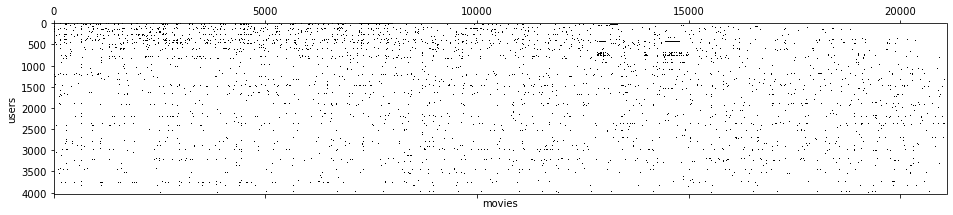

In [113]:
import matplotlib.pylab as plt

fig = plt.figure(figsize=(16,8))
fig.subplots_adjust(top=0.8)
ax1 = plt.axes()
ax1 = plt.spy(df_final)
plt.xlabel("movies")
plt.ylabel("users")
plt.show()

approach: 

* have a list of recurrent users
* for each movie, map user rating to recurrent user list (create NA's for recurrent users that did not rated that movie)
* append these ratings to a scipy sparse matrix, so that col orders are recurrent users, and row order are movies
* save the final sparse scipy matrix

In [105]:
%whos

Variable   Type         Data/Info
---------------------------------
df_final   DataFrame         show_id  /cainamoura<...>030 rows x 21096 columns]
gc         module       <module 'gc' (built-in)>
json       module       <module 'json' from 'c:\\<...>\lib\\json\\__init__.py'>
np         module       <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pylab<...>s\\matplotlib\\pylab.py'>
sns        module       <module 'seaborn' from 'c<...>s\\seaborn\\__init__.py'>
sys        module       <module 'sys' (built-in)>
tqdm       module       <module 'tqdm' from 'c:\\<...>ages\\tqdm\\__init__.py'>
wd         str          D:/Mestrado/2020-2/Curso <...>r System - Movies/scrape/
